## 1. Datos del repositorio de proyectos del mundo real de Scala

<p><b>Aclaración:</b> El contenido de esta <em>notebook</em> es de autoría y ha sido diseñado por <a href="https://www.linkedin.com/in/anita-sarma-0a82972/">Anita Sarma</a> - se unió a la Oregon State University en septiembre de 2015, donde es profesora asociada en la Escuela de Ingeniería Eléctrica y Ciencias de la Computación. Ella tiene un doctorado en Informática y Ciencias de la Computación otorgado por la Universidad de California, Irvine. Sus intereses de investigación están en la intersección de la ingeniería de software y el trabajo cooperativo respaldado por computadora.</p>

<p>Con casi 30 mil cambios y una historia que abarca más de diez años, Scala es un lenguaje de programación maduro. Es un lenguaje de programación de propósito general que recientemente se ha convertido en otro lenguaje destacado para los científicos de datos.</p>
<p>Scala también es un proyecto de código abierto. Los proyectos de código abierto tienen la ventaja de que todos sus historiales de desarrollo (quién realizó los cambios, qué se modificó, revisiones de código, etc.) están disponibles públicamente.</p>
<p>Vamos a leer, limpiar y visualizar el repositorio de proyectos del mundo real de Scala que abarca datos de un sistema de control de versiones (Git), así como un sitio de alojamiento de proyectos (GitHub). Descubriremos quién ha tenido más influencia en su desarrollo y quiénes son los expertos.</p>
<p>El conjunto de datos que utilizaremos, que se minó y extrajo previamente de GitHub, consta de tres archivos:</p>
<ol>
    <li><code>PULLS_2011-2013.csv</code> contiene la información básica sobre las solicitudes de extracción y abarca desde finales de 2011 hasta (pero sin incluir) 2014.</li>
    <li><code>PULLS_2014-2018.csv</code> contiene información idéntica y abarca desde 2014 hasta 2018.</li>
    <li><code>ARCHIVOS_PULL.csv </code> contiene los archivos que fueron modificados por cada solicitud de extracción.</li>
</ol>

In [1]:
# Importar pandas
import pandas as pd

# Cargar los datos
pulls_1 = pd.read_csv('DATASETS/PULLS_2011-2013.csv')
pulls_2 = pd.read_csv('DATASETS/PULLS_2014-2018.csv')
archivos_pull = pd.read_csv('DATASETS/ARCHIVOS_PULL.csv')

In [2]:
pulls_1.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [3]:
pulls_2.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [4]:
archivos_pull.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


## 2. Preparar y limpiar los datos

<p>Primero, necesitaremos combinar los datos de los dos dataframes de extracción (<code>pulls_1</code> y <code>pulls_2</code>) separados.</p>

<p>A continuación, los datos sin procesar extraídos de GitHub contienen fechas en el formato ISO8601. Sin embargo, <code>pandas</code> los importa como cadenas regulares. Para facilitar nuestro análisis, necesitamos convertir las cadenas en objetos <code>DateTime</code> de Python. Los objetos <code>DateTime</code> tienen la propiedad importante de que se pueden comparar y ordenar.</p>

In [5]:
# Combinar pulls_1 y pulls_2
pulls = pulls_1.append(pulls_2)
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


<p>Los tiempos de solicitud de extracción están todos en UTC (también conocido como Tiempo Universal Coordinado). Los tiempos de confirmación, sin embargo, se encuentran en la hora local del autor con información de zona horaria (diferencia de horas de UTC). Para facilitar las comparaciones, debemos convertir todo el tiempo a UTC.</p>

In [6]:
# Convertir la fecha a objetos datetime con formato UTC
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


## 3. Fusionando los DataFrames
<p>Los datos extraídos vienen en dos archivos separados. Fusionar los dos DataFrames nos facilitará el análisis de los datos en las tareas futuras.</p>

In [7]:
# Fusione los dos dataframes
datos = pd.merge(pulls, archivos_pull, on='pid')
datos.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## ¿El proyecto aún se mantiene activamente?

<p>La actividad en un proyecto de código abierto no es muy consistente. Algunos proyectos pueden estar activos durante muchos años después del lanzamiento inicial, mientras que otros pueden ir disminuyendo lentamente hacia el olvido. Antes de comprometerse a contribuir a un proyecto, es importante comprender el estado del proyecto. ¿El desarrollo avanza constantemente o hay una caída? ¿Se ha abandonado el proyecto por completo?</p>

<p>Los datos utilizados en este proyecto se recopilaron en enero de 2018. Estamos interesados en la evolución del número de contribuciones hasta esa fecha.</p>

<p>Para Scala, haremos esto trazando un gráfico de la actividad del proyecto. Calcularemos el número de solicitudes de extracción enviadas cada mes (calendario) durante la vida útil del proyecto. Luego trazaremos estos números para ver la tendencia de las contribuciones.</p>

<ul>
    <li><p>Un recordatorio útil de cómo acceder a varios componentes de una fecha pueden encontrarse en <a href="https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing?ex=12">este ejercicios de Manipulación de Datos con Pandas</a></p></li>
    <li><p>Adicionalmente, recuerda que puedes agrupar por múltiples variables pasando una lista a <code>.groupby()</code>. Este vide de <a href="https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-data-ad6d4643-0e95-470c-8299-f69cc4c83de8?ex=9">Manipulación de Datos con Pandas</a> debería ayudar!</p></li>
</ul>

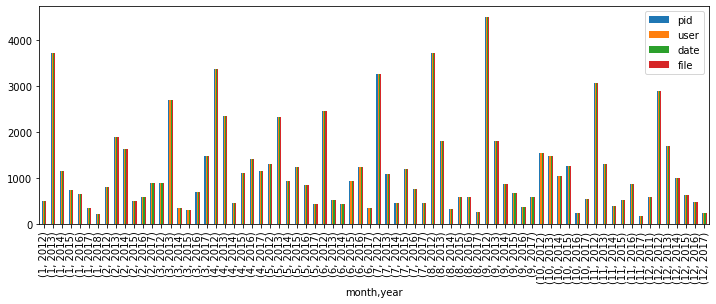

In [8]:
%matplotlib inline

# Crear una columna que almacene el mes
datos['month'] = datos['date'].dt.month

# Crear una columna que almacene el año
datos['year'] = datos['date'].dt.year

# Agrupe por mes y año y cuente las solicitudes de extracción
conteo = datos.groupby(['month','year']).count()

# Grafique los resultados
conteo.plot(kind='bar', figsize=(12,4))

## 5. ¿Existe camaradería en el proyecto?
<p>La estructura organizacional varía de un proyecto a otro, y puede influir en su éxito como contribuyente. Un proyecto que tiene una comunidad muy pequeña podría no ser el mejor para comenzar a trabajar. La pequeña comunidad puede indicar una alta barrera de entrada. Esto puede deberse a varios factores, incluida una comunidad que es reacia a aceptar solicitudes de extracción de "personas ajenas", con las que es difícil trabajar con la base del código, etc. Sin embargo, una comunidad grande puede servir como un indicador de que el proyecto es regular aceptar solicitudes de extracción de nuevos contribuyentes. Tal proyecto sería un buen lugar para comenzar. </p>
<p>Para evaluar la dinámica de la comunidad, trazaremos un histograma del número de solicitudes de extracción enviadas por cada usuario. Una distribución que muestra que hay pocas personas que solo contribuyen con un pequeño número de solicitudes de extracción se puede utilizar como un indicador de que el proyecto no acepta nuevos contribuyentes.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019592A3F940>]],
      dtype=object)

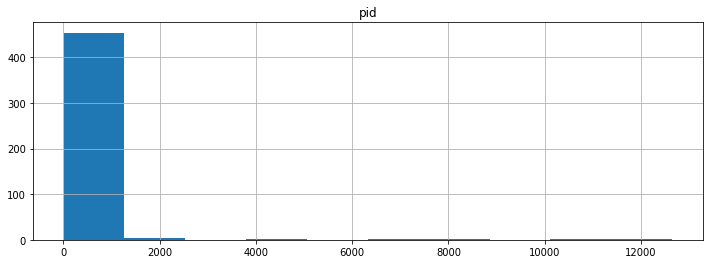

In [9]:
# Agrupar por el remitente
por_usuario = datos[['user','pid']].groupby('user').count()

# Grafique el histograma
por_usuario.hist(figsize=(12,4))

## 6. ¿Qué archivos fueron cambiados en las últimas diez (10) extracciones?

<p>Elegir el lugar correcto para hacer una contribución es tan importante como elegir el proyecto al que contribuir. Algunas partes del código pueden ser estables, algunas pueden estar muertas. Contribuir allí podría no tener el mayor impacto. Por lo tanto, es importante comprender las partes del sistema que se han cambiado recientemente. Esto nos permite identificar las áreas "calientes" del código donde está ocurriendo la mayor parte de la actividad. Centrarse en esas partes podría no ser el uso más efectivo de nuestros tiempos.</p>

In [10]:
# Identificar las últimas 10 solicitudes de extracción
ultimas_10 = pulls.nlargest(10,'pid')
display(ultimas_10)

# Unir los dos conjuntos de datos
pr_unidos = pd.merge(ultimas_10, archivos_pull, on='pid')
display(pr_unidos)

# Identificar los archivos únicos
archivos = set(pr_unidos['file'])

# Imprimir los resultados
display(archivos)

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
9,162011899,joroKr21,2018-01-10 00:45:57+00:00


,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....


{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. ¿Quién hizo la mayoría de las solicitudes de extracción a un archivo dado?

<p>Al contribuir a un proyecto, podríamos necesitar alguna orientación. Es posible que necesitemos información sobre la base de código. Es importante dirigir cualquier pregunta a la persona adecuada. Los contribuyentes a proyectos de código abierto generalmente tienen otros trabajos diarios, por lo que su tiempo es limitado. Es importante dirigir nuestras preguntas a las personas adecuadas. Una forma de identificar el objetivo correcto para nuestras consultas es utilizar su historial de contribuciones.</p>

<p> Identificamos <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> como un cambio reciente. Estamos interesados en los 3 mejores desarrolladores que cambiaron ese archivo. Esos desarrolladores son los que tienen más probabilidades de comprender mejor el código.</p>

In [11]:
# Este es el archivo en el que estamos interesados
archivo = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identificar los cometidos que cambiaron el archivo
archivo_pr = datos[datos['file']==archivo]

# Contar el número de cambios realizados por cada desarrollador
counteo_autor = archivo_pr[['user','file']].groupby('user').count()

# Imprimir el top 3 desarrolladores
counteo_autor.nlargest(3,'file')

,file
user,
xeno-by,11
retronym,5
soc,4


## ¿Quién hizo las últimas solicitudes de extracción a un archivo dado?

<p>Los proyectos de código abierto sufren de membresía fluctuante. Esto hace que el problema de encontrar a la persona adecuada sea más desafiante: la persona tiene que estar bien informada <em>y</em> aún estar involucrada en el proyecto. Es posible que una persona que contribuyó mucho en el pasado ya no esté disponible (o dispuesta) a ayudar. Para obtener una mejor comprensión, necesitamos investigar la historia más reciente de esa parte particular del sistema.</p>
<p>Como en la tarea anterior, observaremos el historial de <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code></p>

In [12]:
# Seleccione las solicitudes de extracción que cambiaron el archivo
archivo_pr = datos[datos['file']==archivo]
display(archivo_pr.head())

# Encuentre a los usuarios con las 10 solicitudes de extracción más recientes
usuarios_ultimos_10 = set(archivo_pr.nlargest(10,'date')['user'])

# Imprima los resultados
display(usuarios_ultimos_10)

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013


{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9. Las solicitudes de extracción de dos desarrolladores específicos

<p>Ahora que hemos identificado dos contactos potenciales en los proyectos, necesitamos encontrar a la persona que estuvo más involucrada en el proyecto en los últimos tiempos. Es muy probable que esa persona responda nuestras preguntas. Para cada año calendario, estamos interesados en comprender la cantidad de solicitudes de extracción que presentaron los autores. Esto nos dará una imagen de alto nivel de su tendencia de contribución al proyecto.</p>

,pid,user,date
7,11126653,xeno-by,2013-12-28 19:39:23+00:00
9,11121557,xeno-by,2013-12-27 23:50:56+00:00
10,11121465,xeno-by,2013-12-27 23:41:05+00:00
11,11121327,xeno-by,2013-12-27 23:25:52+00:00
12,11114584,xeno-by,2013-12-27 15:51:50+00:00


,user,date,pid
0,soc,2011,12
1,soc,2012,44
2,soc,2013,117
3,soc,2014,20
4,soc,2015,24
5,soc,2016,21
6,xeno-by,2011,20
7,xeno-by,2012,271
8,xeno-by,2013,123
9,xeno-by,2014,60


user,soc,xeno-by
date,,
2011,12,20
2012,44,271
2013,117,123
2014,20,60
2015,24,3
2016,21,0


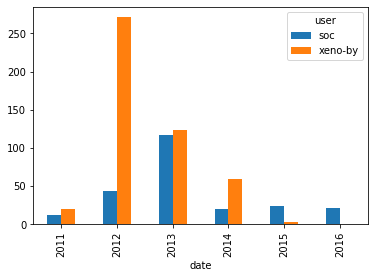

In [13]:
# los desarrolladores que nos interesan
autores = ['xeno-by', 'soc']

# Obtener todas las solicitudes de extracción de los desarrolladores
por_autor = pulls[pulls['user'].isin(autores)]
display(por_autor.head())

# Contar el número de solicitudes de extracción cada año
conteo = por_autor.groupby([por_autor['user'], por_autor['date'].dt.year]).agg({'pid': 'count'}).reset_index()
display(conteo)

# Convertir la tabla a un formato ancho
conteo_ancho = conteo.pivot_table(index='date', columns='user', values='pid', fill_value=0)
display(conteo_ancho)

# Graficar los resultados
conteo_ancho.plot(kind='bar')

## 10. Visualizar las contribuciones de cada desarrollador

<p>Como se mencionó anteriormente, es importante hacer una distinción entre la experiencia global y los niveles de contribución y los niveles de contribución a un nivel más granular (archivo, submódulo, etc.). En nuestro caso, queremos ver cuál de nuestros dos desarrolladores de interés tienen la mayor experiencia con el código en un archivo determinado. Mediremos la experiencia según la cantidad de solicitudes de extracción enviadas que afectan a ese archivo y qué tan recientes se enviaron esas solicitudes de extracción.</p>

In [14]:
display(autores)
display(archivo)

['xeno-by', 'soc']

'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [15]:
# Seleccionar las solicitudes de extracción enviadas por los autores, desde el dataframe 'datos'
por_autor = datos[datos['user'].isin(autores)]
display(por_autor.head())

# Seleccionar las solicitudes de extracción que afectaron al archivo
por_archivo = por_autor[por_autor['file']==archivo]
display(por_archivo.head())

,pid,user,date,file,month,year
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,12,2013
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,12,2013
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,12,2013
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,12,2013
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,12,2013


,pid,user,date,file,month,year
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
28951,2721711,soc,2012-10-21 19:58:20+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,10,2012
35498,2072662,xeno-by,2012-08-16 05:39:22+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012
35608,2071228,xeno-by,2012-08-15 23:41:59+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012


In [16]:
# Agrupe y cuente el número de solicitudes de extracción hechas por cada usuario en cada año
agrupado = por_archivo.groupby(['user','year']).count()['pid'].reset_index()
display(agrupado.head())

# Transforme los datos a un formato ancho
agrupado_ancho = agrupado.pivot_table(index='year', columns='user', values='pid', fill_value=0)
display(agrupado_ancho.head())

,user,year,pid
0,soc,2012,2
1,soc,2013,2
2,xeno-by,2012,10
3,xeno-by,2014,1


user,soc,xeno-by
year,,
2012,2,10
2013,2,0
2014,0,1


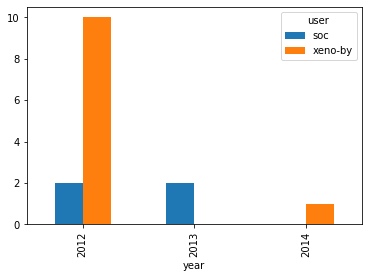

In [17]:
# Grafique los resultados
agrupado_ancho.plot(kind='bar')